In [13]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'/home/pranali/SYprogramming/DVE/dataset/movies (1).csv', encoding='ISO-8859-1')

# 1. Clean 'Year' column: remove non-numeric characters, negative signs, and convert to positive integers
data['Year'] = pd.to_numeric(data['Year'].astype(str).str.replace(r'[^0-9]', '', regex=True), errors='coerce')

# 2. Clean 'Duration' column: extract numeric part only
data['Duration'] = pd.to_numeric(data['Duration'].str.extract(r'(\d+)')[0], errors='coerce')

# 3. Clean 'Votes' column: remove commas and convert to numeric
data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',', ''), errors='coerce')

# Drop rows with NaN in required columns to clean the dataset
data_cleaned = data.dropna(subset=['Year', 'Duration', 'Votes'])

# Save the cleaned data for download
cleaned_file_path = '/home/pranali/SYprogramming/DVE/dataset/cleaned_movies_dataset.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print("Cleaned dataset saved at:", cleaned_file_path)



'''Univariate Analysis: Histograms for numerical features (Duration, Rating, Votes).
Box Plots: Outlier detection in numerical features.
Bivariate Analysis: Scatter plot (Duration vs Rating).
Correlation Heatmap: Understanding relationships between numerical features.
Categorical Analysis: Box plot of Rating by Genre'''


Cleaned dataset saved at: /home/pranali/SYprogramming/DVE/dataset/cleaned_movies_dataset.csv


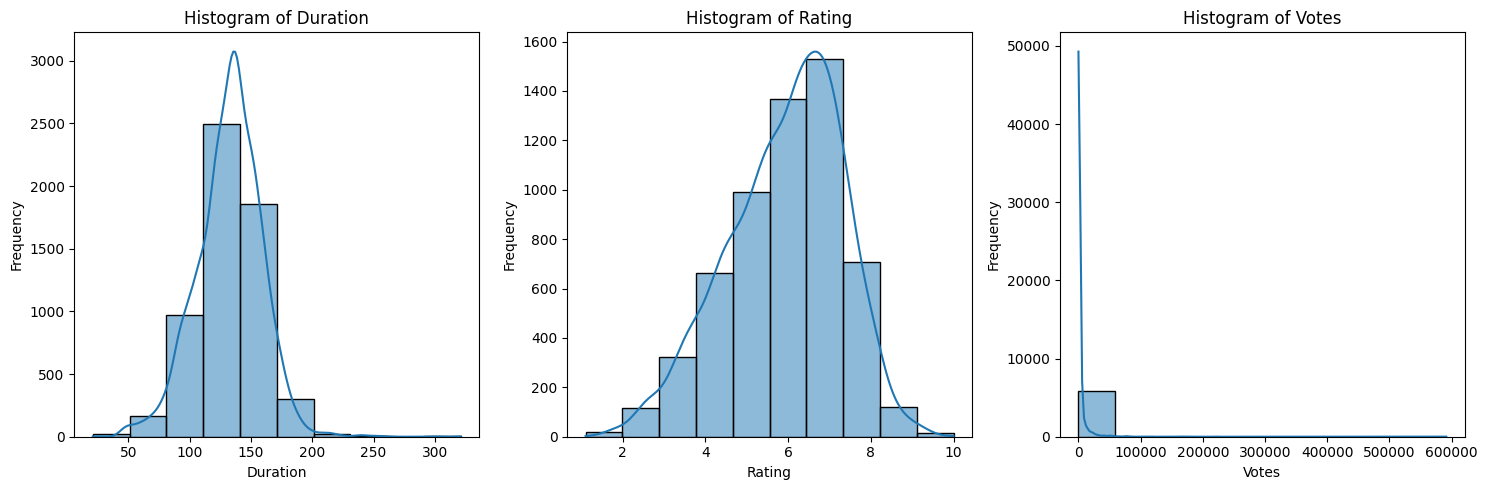

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'/home/pranali/SYprogramming/DVE/dataset/cleaned_movies_dataset.csv')
#Univariate Analysis: Histograms for Numerical Features (Duration, Rating, Votes)
# List of numerical columns in the dataset
numerical_columns = ['Duration', 'Rating', 'Votes']

# Plot histograms for each numerical column
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=10, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


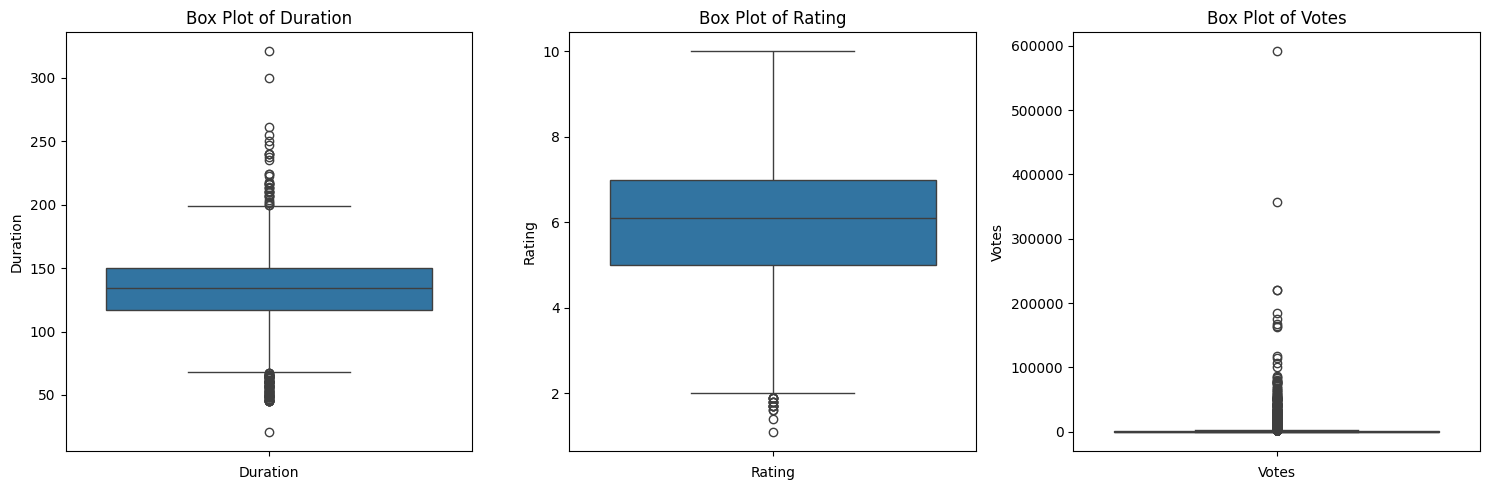

In [5]:

# List of numerical columns
numerical_columns = ['Duration', 'Rating', 'Votes']

# Box plots for each numerical feature
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column
plt.tight_layout()
plt.show()


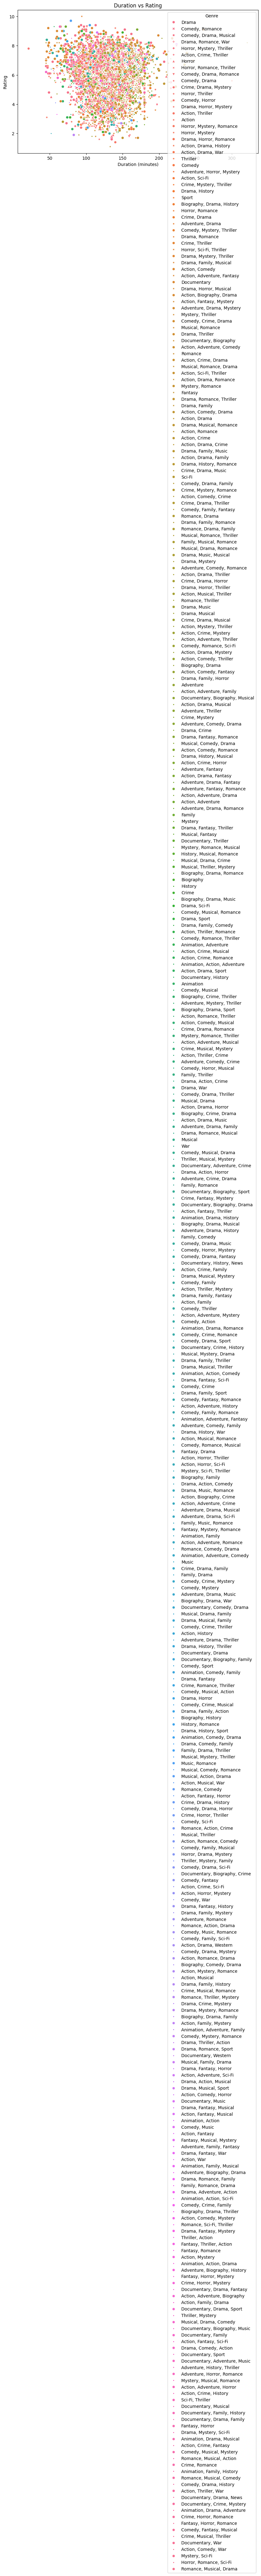

In [7]:
# Scatter plot for Duration vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Duration', y='Rating', hue='Genre', style='Genre')  # Adjust 'Genre' for hue
plt.title('Duration vs Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()

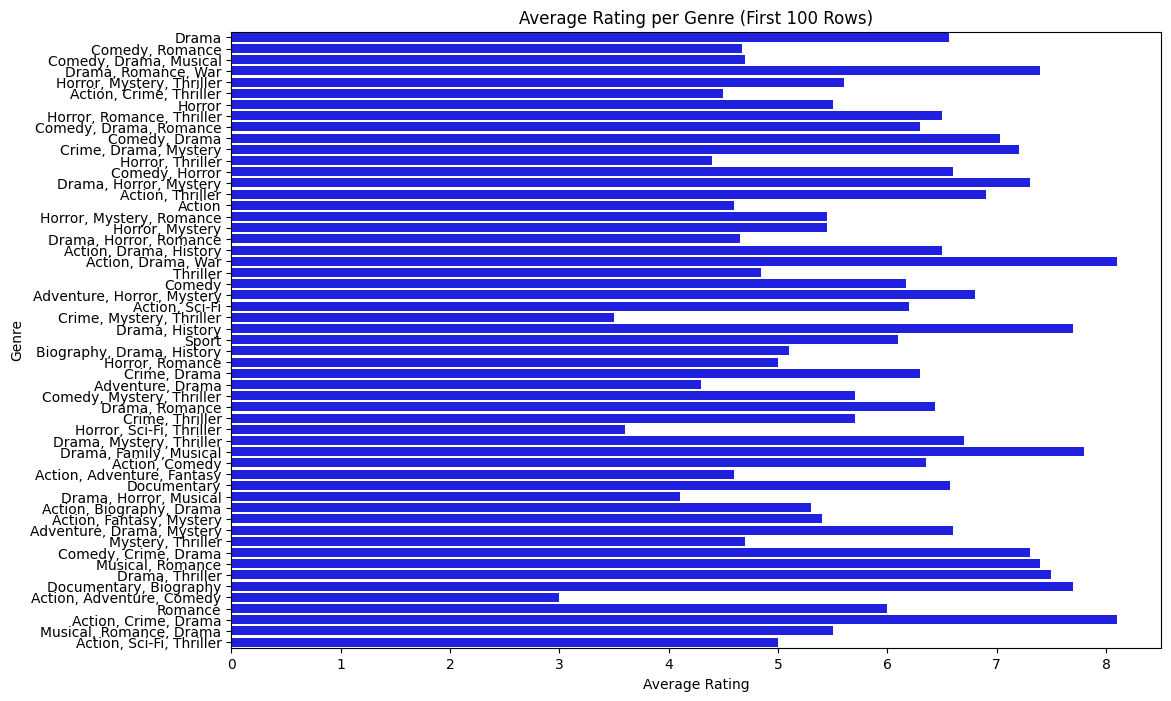

In [7]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'/home/pranali/SYprogramming/DVE/dataset/cleaned_movies_dataset.csv')

# Display the first and last few rows
data.head()
data.tail()

# Fill NaN values in 'Genre' column with an empty string and convert to string type
data['Genre'] = data['Genre'].fillna('').astype(str)

# Select only the first 100 rows
data_100 = data.head(100)

# Create a bar plot for average ratings per genre in the first 100 rows
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Genre', data=data_100, estimator=lambda x: sum(x) / len(x), ci=None, color="blue")

# Rotate genre labels for readability
plt.yticks(rotation=0)
plt.title('Average Rating per Genre (First 100 Rows)')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

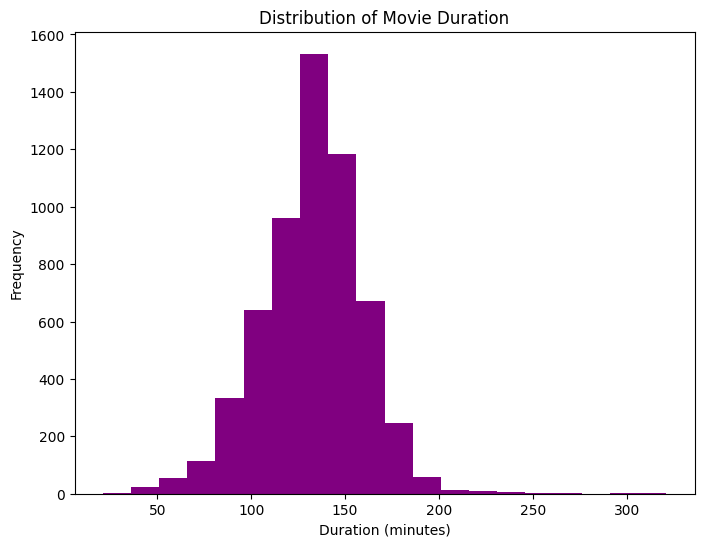

In [8]:
# Histogram of movie duration
plt.figure(figsize=(8, 6))
plt.hist(data['Duration'], color='purple', bins=20)
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


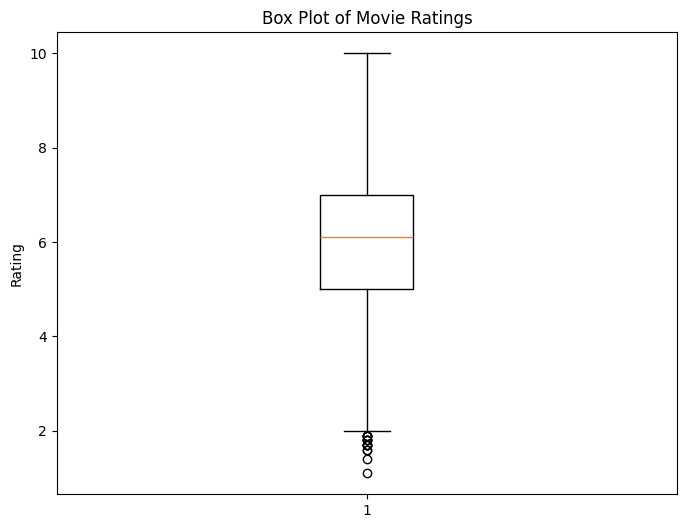

In [9]:
# Box plot of movie ratings
plt.figure(figsize=(8, 6))
plt.boxplot(data['Rating'].dropna())
plt.title('Box Plot of Movie Ratings')
plt.ylabel('Rating')
plt.show()


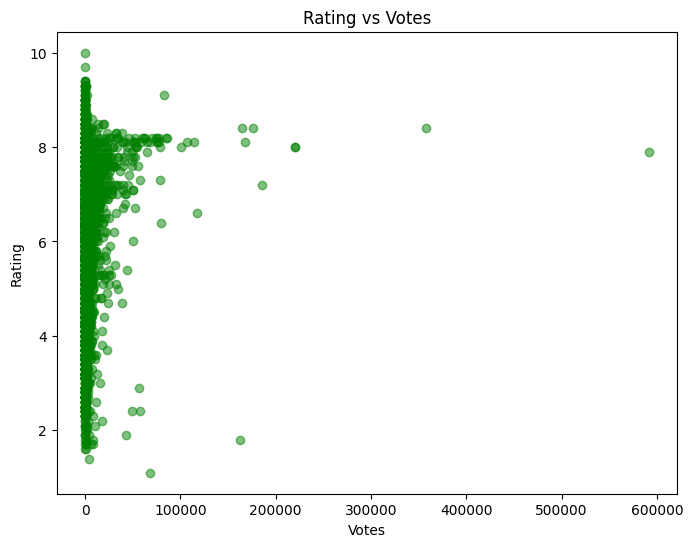

In [10]:
# Scatter plot of Rating vs Votes
plt.figure(figsize=(8, 6))
plt.scatter(data['Votes'], data['Rating'], color='green', alpha=0.5)
plt.title('Rating vs Votes')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()


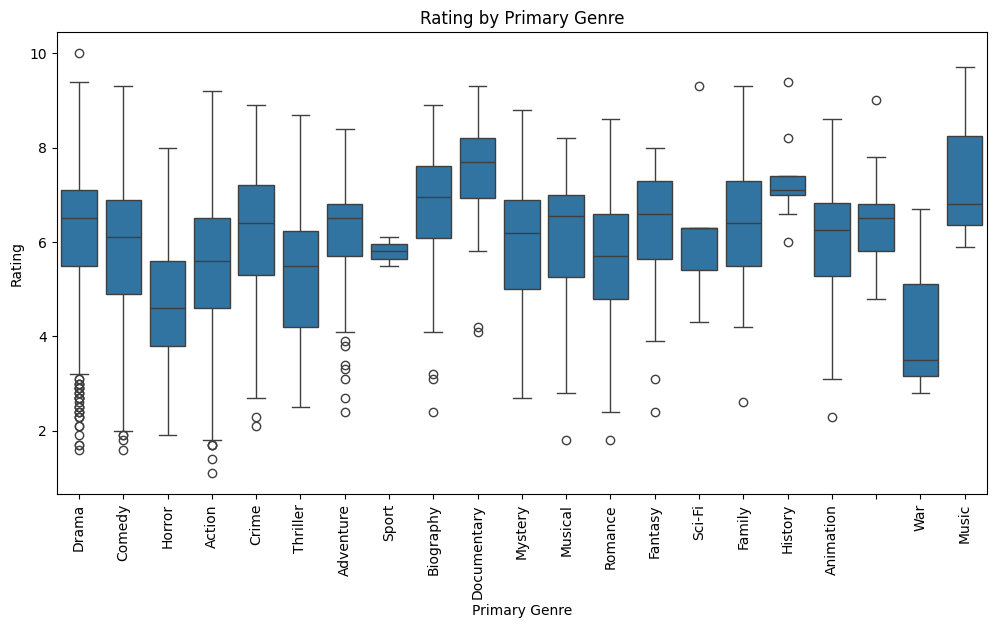

In [11]:
# Extract primary genre if there are multiple
data['Primary Genre'] = data['Genre'].apply(lambda x: x.split(',')[0])

# Box plot of rating by primary genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Primary Genre', y='Rating', data=data)
plt.xticks(rotation=90)
plt.title('Rating by Primary Genre')
plt.xlabel('Primary Genre')
plt.ylabel('Rating')
plt.show()


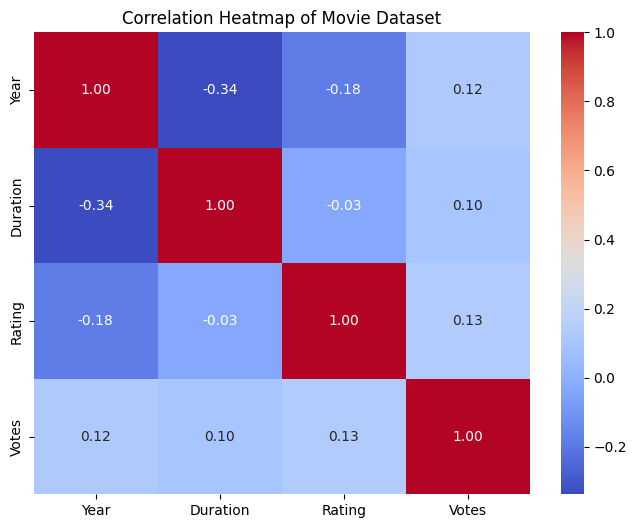

In [8]:
# Select numeric columns for correlation
numeric_columns = ['Year', 'Duration', 'Rating', 'Votes']
correlation_matrix = data[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Movie Dataset')
plt.show()

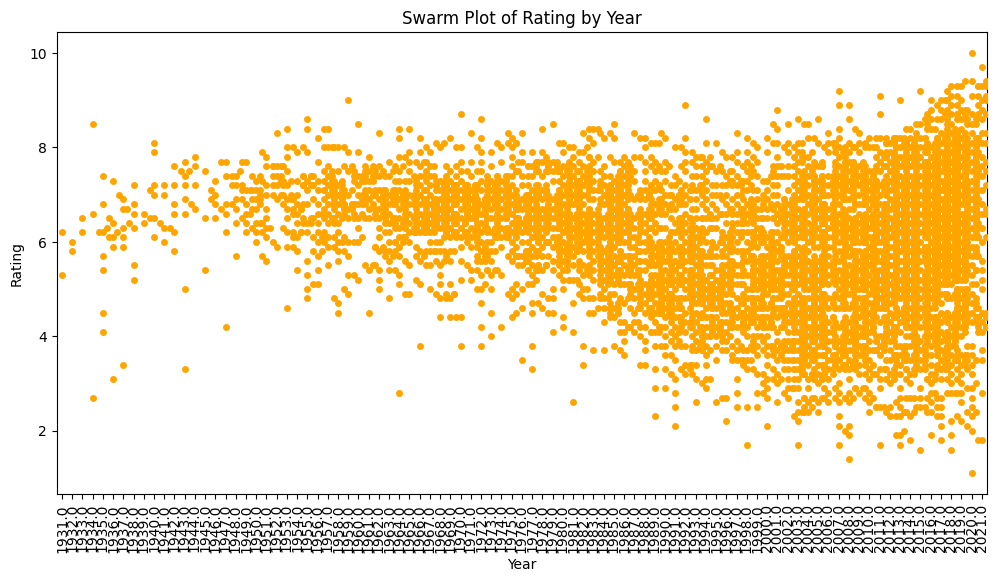

In [13]:
# Swarm plot of rating by release year
plt.figure(figsize=(12, 6))
sns.swarmplot(x=data['Year'], y=data['Rating'], color="orange")
plt.xticks(rotation=90)
plt.title('Swarm Plot of Rating by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()


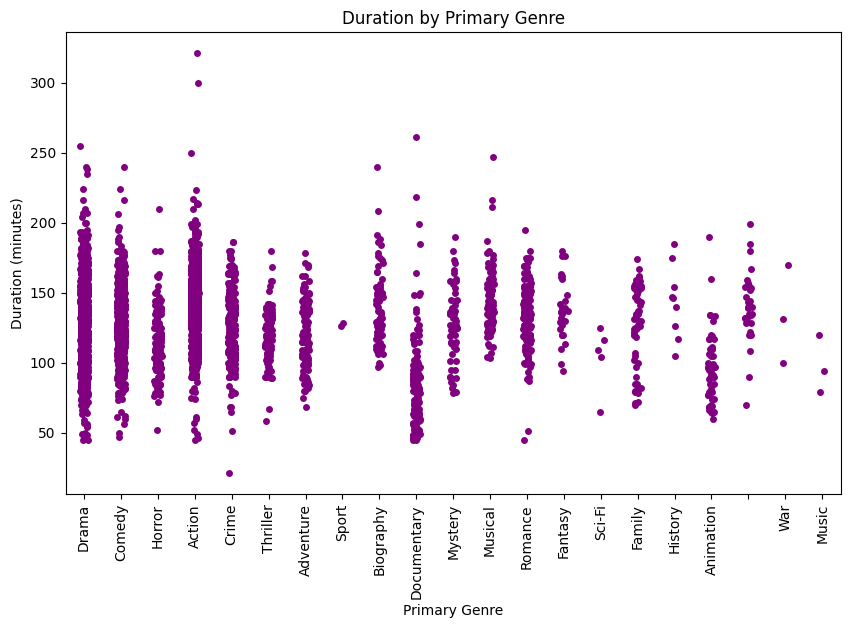

In [14]:
# Strip plot of duration by genre
plt.figure(figsize=(10, 6))
sns.stripplot(x='Primary Genre', y='Duration', data=data, jitter=True, color='purple')
plt.xticks(rotation=90)
plt.title('Duration by Primary Genre')
plt.xlabel('Primary Genre')
plt.ylabel('Duration (minutes)')
plt.show()


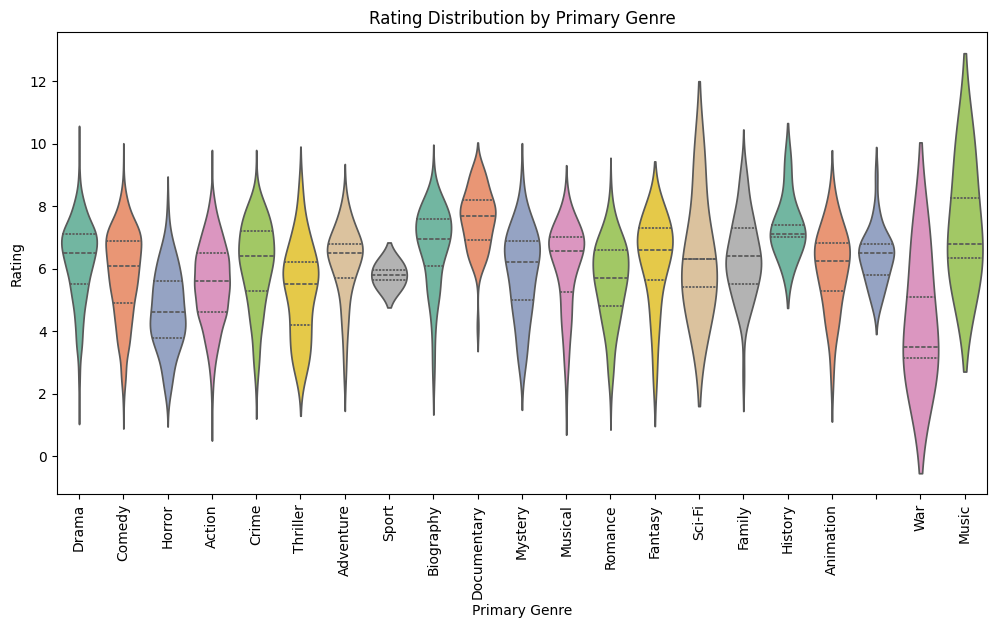

In [15]:
# Violin plot of rating distribution by genre
plt.figure(figsize=(12, 6))
sns.violinplot(x='Primary Genre', y='Rating', data=data, inner='quartile', palette="Set2")
plt.xticks(rotation=90)
plt.title('Rating Distribution by Primary Genre')
plt.xlabel('Primary Genre')
plt.ylabel('Rating')
plt.show()


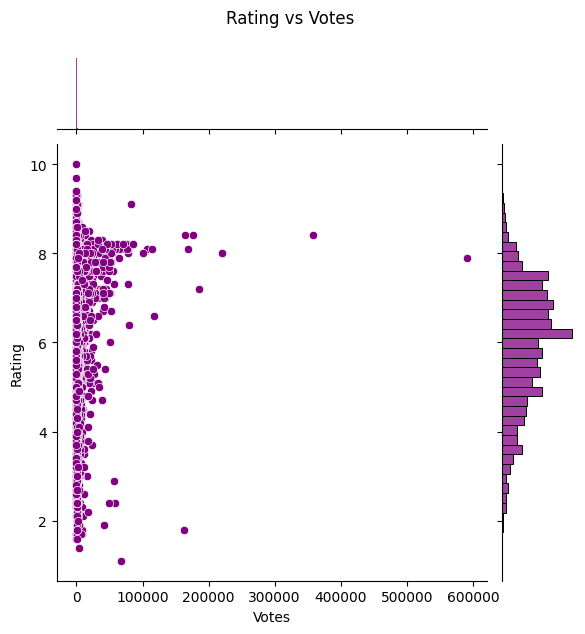

In [16]:
# Joint plot of Rating vs Votes
sns.jointplot(x='Votes', y='Rating', data=data, kind="scatter", color="purple")
plt.suptitle('Rating vs Votes', y=1.05)
plt.show()


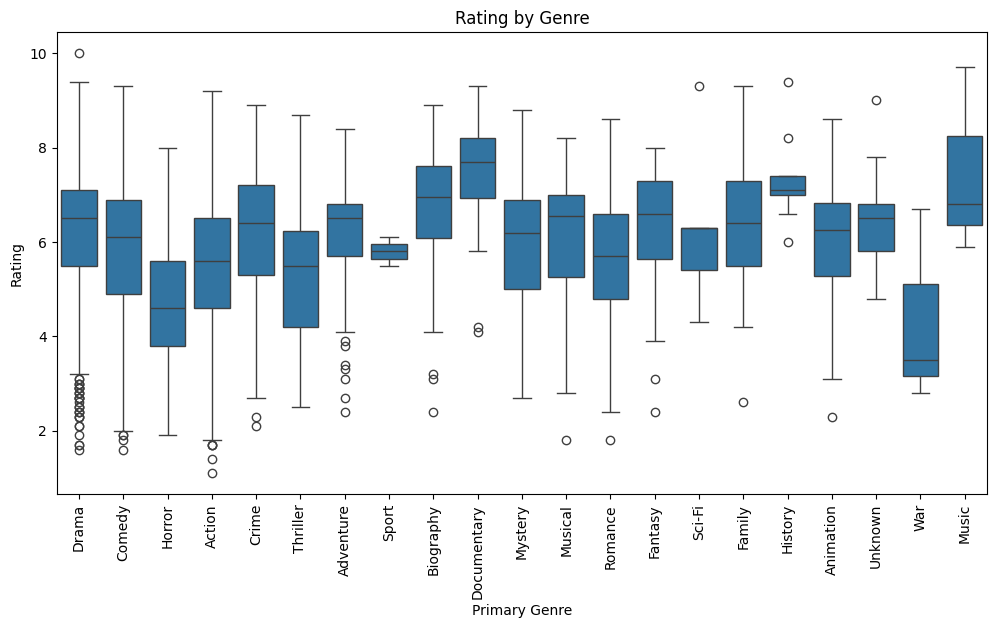

In [9]:
# Fill missing genres and extract the primary genre
data['Genre'] = data['Genre'].fillna('Unknown')
data['primary_genre'] = data['Genre'].apply(lambda x: x.split(',')[0])  # Extract first genre if multiple

# Box plot: Rating by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_genre', y='Rating', data=data)
plt.xticks(rotation=90)
plt.title('Rating by Genre')
plt.xlabel('Primary Genre')
plt.ylabel('Rating')
plt.show()

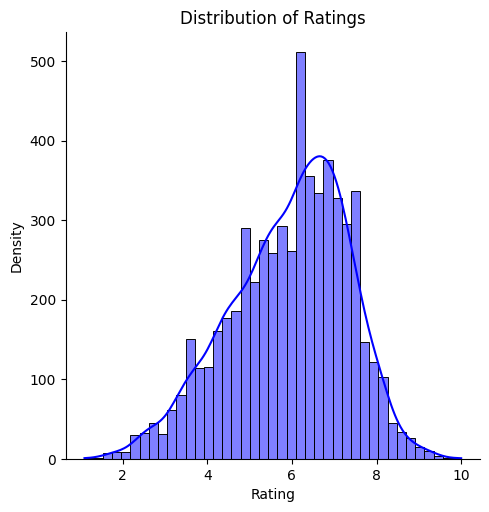

In [17]:
# Distribution plot of Ratings
sns.displot(data['Rating'], color='blue', kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()


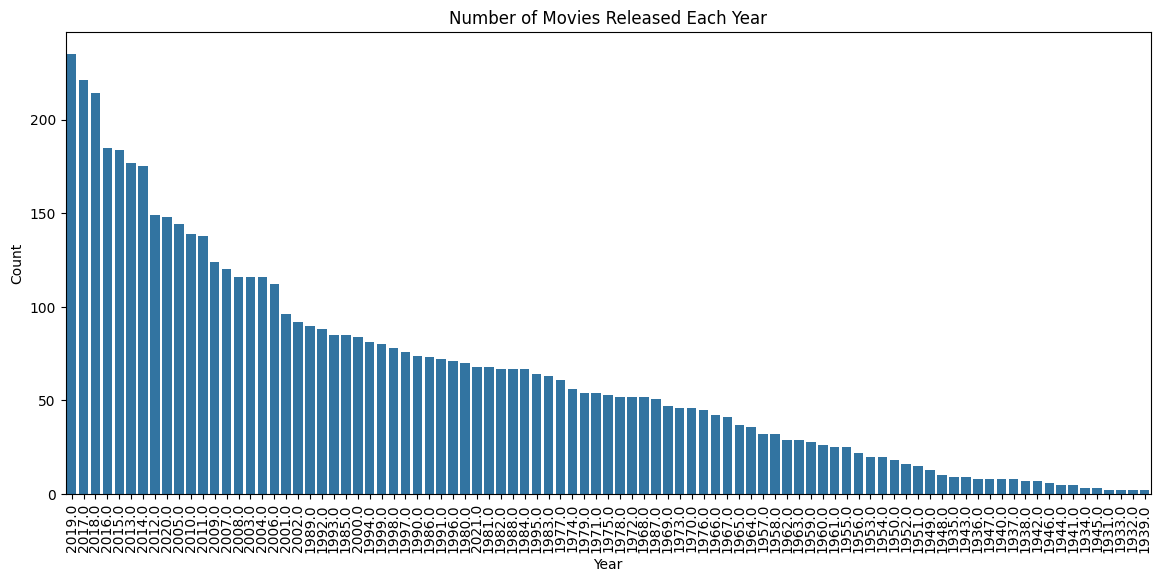

In [10]:
# Count plot for number of movies by year
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='Year', order=data['Year'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


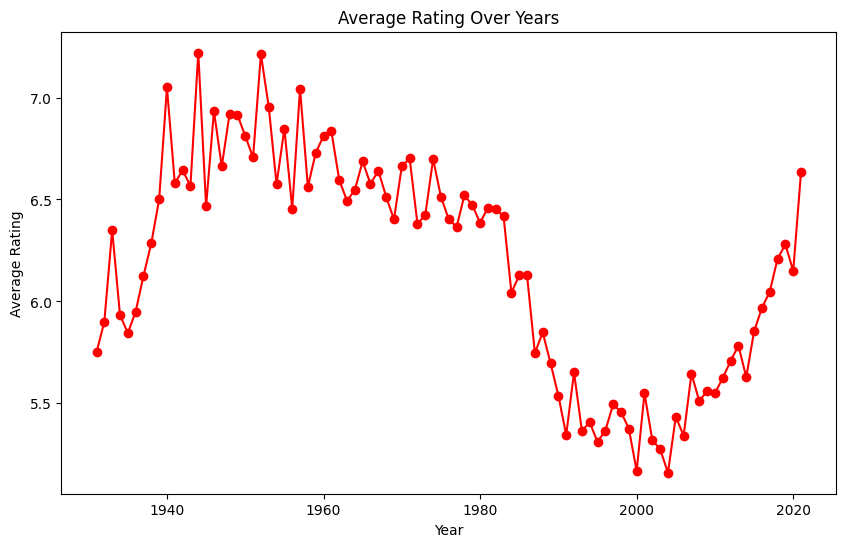

In [18]:
# Average rating over years
avg_rating_per_year = data.groupby('Year')['Rating'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_rating_per_year, marker='o', color='red')
plt.title('Average Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


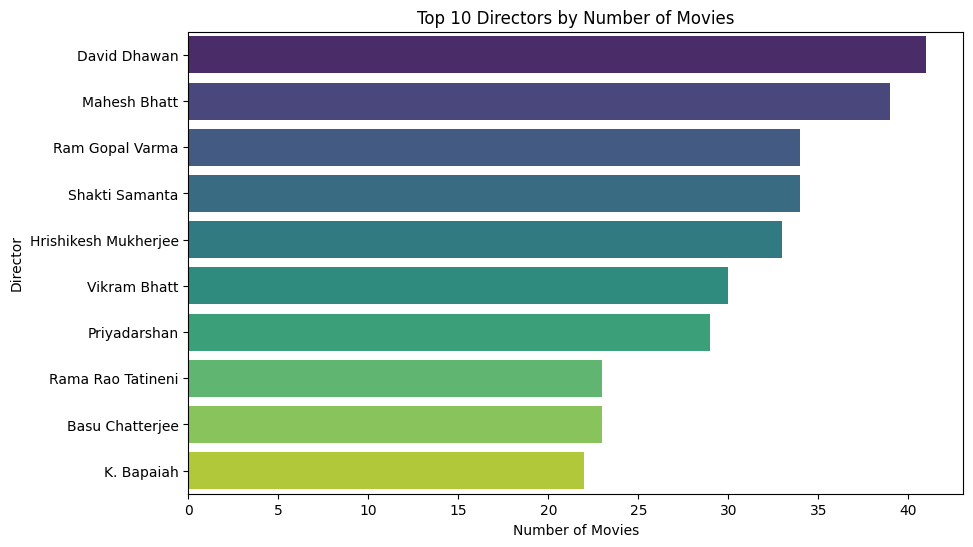

In [14]:
# Top 10 directors by number of movies
top_directors = data['Director'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_directors.index, x=top_directors.values, palette="viridis")
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()


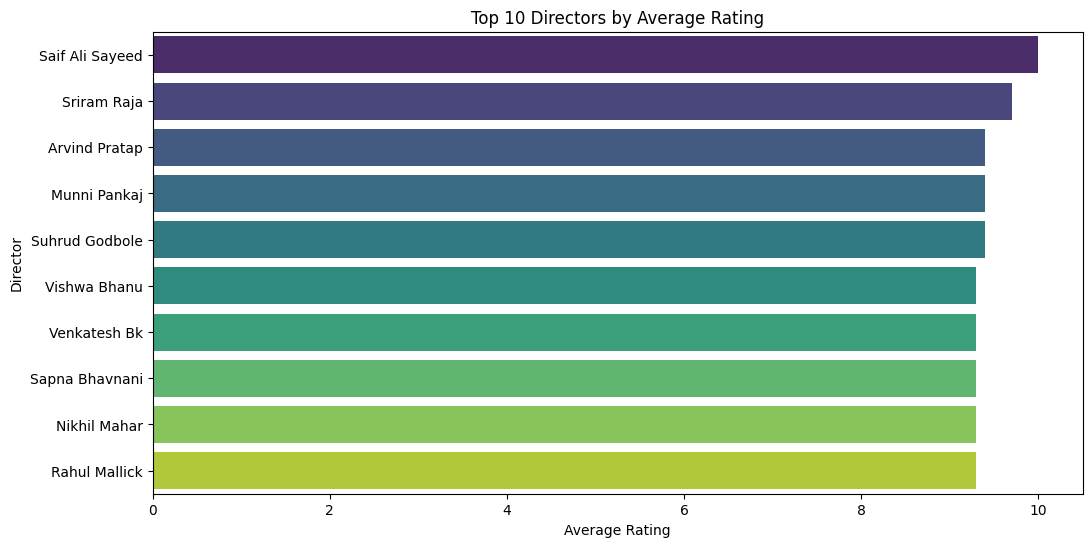

In [19]:
# Top 10 Directors by Average Rating
top_directors = data.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()


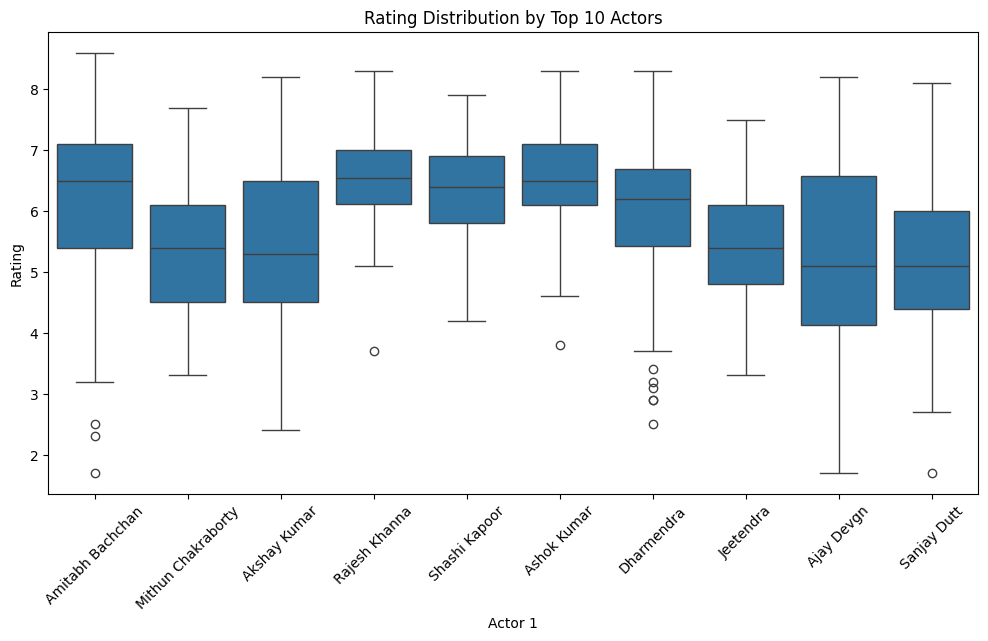

In [12]:
# Top 10 actors by frequency in 'Actor 1' column
top_actors = data['Actor 1'].value_counts().nlargest(10).index
top_actor_data = data[data['Actor 1'].isin(top_actors)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_actor_data, x='Actor 1', y='Rating')
plt.xticks(rotation=45)
plt.title('Rating Distribution by Top 10 Actors')
plt.xlabel('Actor 1')
plt.ylabel('Rating')
plt.show()


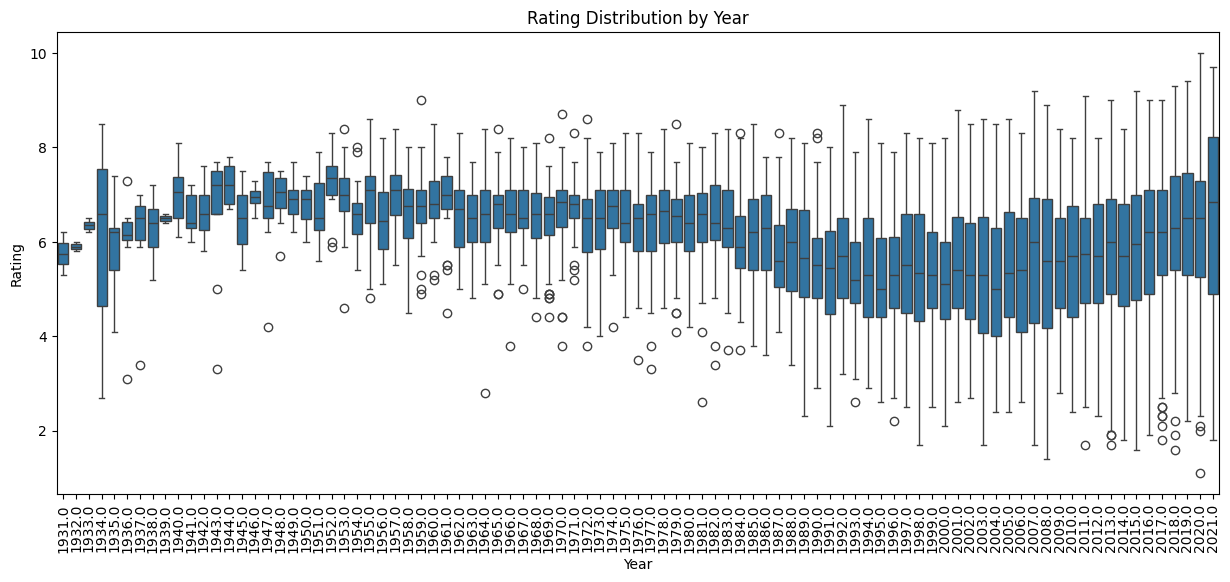

In [20]:
# Box plot of Rating distribution by Year
plt.figure(figsize=(15, 6))
sns.boxplot(x='Year', y='Rating', data=data)
plt.xticks(rotation=90)
plt.title('Rating Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()


In [3]:
import pandas as pd
df = pd.read_csv(r'/home/pranali/SYprogramming/DVE/dataset/movies (1).csv', encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


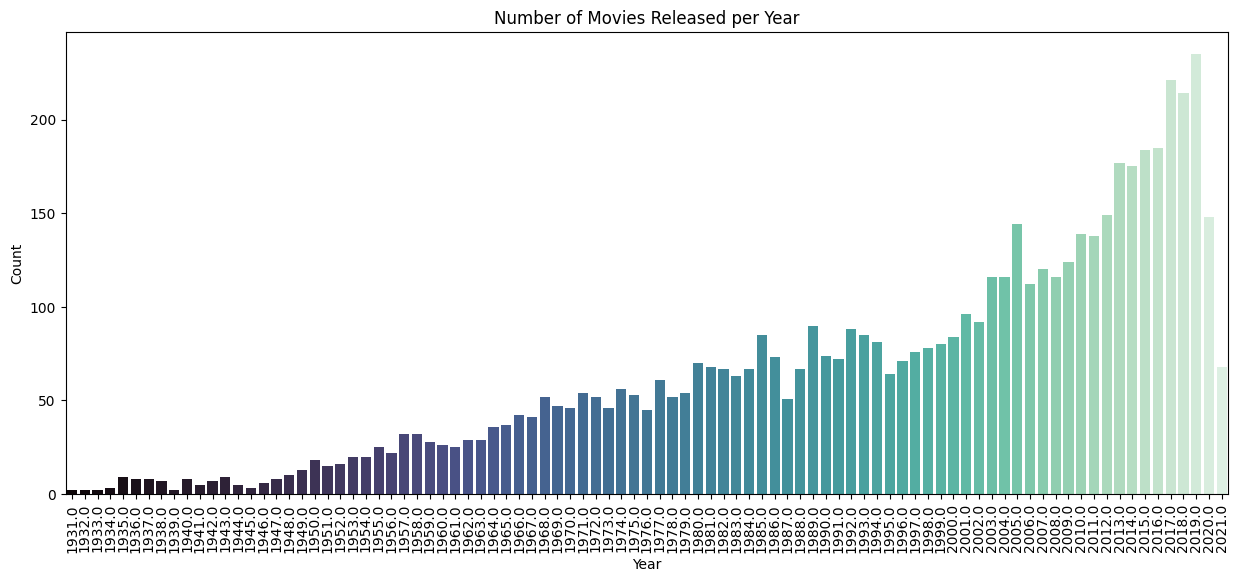

In [21]:
# Count plot of movies per year
plt.figure(figsize=(15, 6))
sns.countplot(x='Year', data=data, palette="mako")
plt.xticks(rotation=90)
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


In [4]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
# deleting the rows which have null Ratings
df.dropna(subset=['Rating'],inplace=True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [6]:
# dropping the null values from the following coulmns 
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

In [7]:
# converting the duration coulmn from string to number and removing the min from it
df['Duration']=pd.to_numeric(df['Duration'].str.strip(' min'))

In [8]:
import warnings
warnings.filterwarnings('ignore')
# replacing the null duration values with the mean values of the duration
df['Duration'].fillna(df['Duration'].mean(),inplace=True)

In [9]:
# checking the number of null values in the data
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [10]:
# resetting the index of the dataframe after dropping the values
df.reset_index(inplace=True)
df

,index,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,1,#Gadhvi (He thought he was Gandhi),(2019),109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,3,#Yaaram,(2019),110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,5,...Aur Pyaar Ho Gaya,(1997),147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,6,...Yahaan,(2005),142.000000,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,8,?: A Question Mark,(2012),82.000000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...,...
7553,15501,Zulm Ki Hukumat,(1992),133.439124,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
7554,15503,Zulm Ki Zanjeer,(1989),125.000000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
7555,15504,Zulm Ko Jala Doonga,(1988),133.439124,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
7556,15505,Zulmi,(1999),129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [12]:
#dropping duplicate values from the dataframe
df.drop_duplicates(inplace=True)

In [13]:
# checking the shape of the dataframe
df.shape

(7558, 11)

In [14]:
# Function to remove any negative signs and parentheses
def clean_year(year):
    # Ensure it's treated as a string to avoid issues
    year_str = str(year)
    # Remove any negative signs and parentheses
    year_str = year_str.replace('-', '').replace('(', '').replace(')', '')
    return year_str

# Applying the function to the 'Year' column
df['Year'] = df['Year'].apply(clean_year)

# Converting 'Year' back to integer
df['Year'] = df['Year'].astype(int)

# Dropping duplicate values from the DataFrame
df.drop_duplicates(inplace=True)

# Checking the cleaned DataFrame
df.head()

,index,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [15]:
# removing the ',' from the votes coulmn and maiking it an integer 
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7558 entries, 0 to 7557
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     7558 non-null   int64  
 1   Name      7558 non-null   object 
 2   Year      7558 non-null   int64  
 3   Duration  7558 non-null   float64
 4   Genre     7558 non-null   object 
 5   Rating    7558 non-null   float64
 6   Votes     7558 non-null   int64  
 7   Director  7558 non-null   object 
 8   Actor 1   7558 non-null   object 
 9   Actor 2   7558 non-null   object 
 10  Actor 3   7558 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 649.6+ KB


In [16]:
#Viewing number of unique years from the dataframe
df['Year'].unique()

array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 1946, 2008, 1994, 2007, 2013, 2003,
       1998, 1979, 1974, 2015, 2006, 1981, 2020, 1985, 2011, 1988, 1995,
       1987, 1999, 1973, 1968, 1953, 1986, 1982, 1977, 1950, 1969, 1948,
       1967, 1970, 1990, 1989, 1947, 2001, 2000, 1971, 1978, 1944, 1963,
       1992, 1976, 1984, 1975, 1980, 1966, 1972, 1956, 1960, 1964, 1952,
       1959, 1951, 1954, 1962, 1961, 1957, 1965, 1996, 1933, 1955, 1983,
       1936, 1949, 1940, 1945, 1938, 1941, 1942, 1932, 1935, 1937, 1931,
       1943, 1917, 1939, 1934])

In [17]:
# Making a different dataset for predicting the Ratings so that we don't lose our original cleaned data
df_update=df.drop('Name',axis=1)
df_update

,index,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,1,2019,109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,3,2019,110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,5,1997,147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,6,2005,142.000000,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,8,2012,82.000000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
7553,15501,1992,133.439124,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
7554,15503,1989,125.000000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
7555,15504,1988,133.439124,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
7556,15505,1999,129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
# df_update.drop('index',axis=1,inplace=True)
# df_update.info()

In [18]:
# Encoding our data for better model building
actor1_encoded = df_update.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoded = df_update.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoded = df_update.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoded = df_update.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoded = df_update.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

df_update['actor1_encoded'] = df_update['Actor 1'].map(actor1_encoded['Rating']).apply(lambda x: round(x, 1))
df_update['actor2_encoded'] = df_update['Actor 2'].map(actor2_encoded['Rating']).apply(lambda x: round(x, 1))
df_update['actor3_encoded'] = df_update['Actor 3'].map(actor3_encoded['Rating']).apply(lambda x: round(x, 1))
df_update['director_encoded'] = df_update['Director'].map(director_encoded['Rating']).apply(lambda x: round(x, 1))
df_update['genre_encoded'] = df_update['Genre'].map(genre_encoded['Rating']).apply(lambda x: round(x, 1))

df_update

,index,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
0,1,2019,109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.8,7.0,7.0,7.0,6.3
1,3,2019,110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.4,4.4,4.5,4.4,5.7
2,5,1997,147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,4.8,5.8,5.8,5.4,6.2
3,6,2005,142.000000,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,5.3,6.0,6.5,7.5,6.8
4,8,2012,82.000000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.6,5.9,5.6,5.6,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7553,15501,1992,133.439124,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda,5.7,6.1,4.9,5.6,5.6
7554,15503,1989,125.000000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,6.3,5.8,5.8,5.9,5.6
7555,15504,1988,133.439124,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,6.0,3.7,4.6,4.1,5.0
7556,15505,1999,129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.5,4.6,5.6,5.2,5.5


In [19]:
df_update.drop(['Actor 1','Actor 2','Actor 3','Director','Genre'],axis=1,inplace=True)
df_update

,index,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
0,1,2019,109.000000,7.0,8,6.8,7.0,7.0,7.0,6.3
1,3,2019,110.000000,4.4,35,5.4,4.4,4.5,4.4,5.7
2,5,1997,147.000000,4.7,827,4.8,5.8,5.8,5.4,6.2
3,6,2005,142.000000,7.4,1086,5.3,6.0,6.5,7.5,6.8
4,8,2012,82.000000,5.6,326,5.6,5.9,5.6,5.6,5.5
...,...,...,...,...,...,...,...,...,...,...
7553,15501,1992,133.439124,5.3,135,5.7,6.1,4.9,5.6,5.6
7554,15503,1989,125.000000,5.8,44,6.3,5.8,5.8,5.9,5.6
7555,15504,1988,133.439124,4.6,11,6.0,3.7,4.6,4.1,5.0
7556,15505,1999,129.000000,4.5,655,5.5,4.6,5.6,5.2,5.5


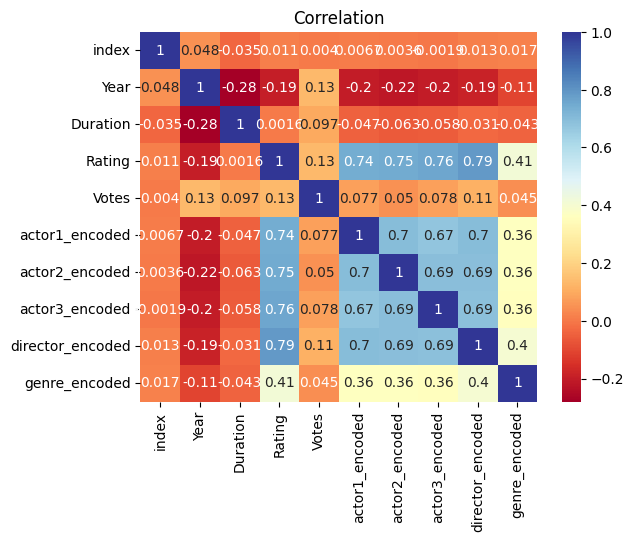

In [20]:
# checking coorelation
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_update.corr(), annot=True, cmap='RdYlBu')
plt.title('Correlation')
plt.show()

In [21]:
X=df_update.drop('Rating',axis=1)
Y=df_update['Rating']
X.head(5)

,index,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
0,1,2019,109.0,8,6.8,7.0,7.0,7.0,6.3
1,3,2019,110.0,35,5.4,4.4,4.5,4.4,5.7
2,5,1997,147.0,827,4.8,5.8,5.8,5.4,6.2
3,6,2005,142.0,1086,5.3,6.0,6.5,7.5,6.8
4,8,2012,82.0,326,5.6,5.9,5.6,5.6,5.5


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# splitting the data for training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,train_size=0.8,random_state=42)

In [23]:
print("Shape of training Data ",X_train.shape)
print("Shape of training target ",Y_train.shape)
print("Shape of testing Data ",X_test.shape)
print("Shape of testing target ",Y_test.shape)

Shape of training Data  (6046, 9)
Shape of training target  (6046,)
Shape of testing Data  (1512, 9)
Shape of testing target  (1512,)


In [24]:
# Building a linear regression model
LR=LinearRegression()
LR.fit(X_train,Y_train)
y_pred_LR=LR.predict(X_test)


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('R2: ', r2_score(Y_test, y_pred_LR))
print('mae: ',mean_absolute_error(Y_test, y_pred_LR))
print('mse: ', mean_squared_error(Y_test, y_pred_LR))

R2:  0.7578606773353418
mae:  0.4986518753952334
mse:  0.4486447903973706


In [26]:
import numpy as np
results = pd.DataFrame({'actual': Y_test,
                        'predicted': y_pred_LR.ravel(),
                        'residual': Y_test - y_pred_LR}
                      )
results.head()

,actual,predicted,residual
3148,7.4,6.618167,0.781833
1662,4.9,5.487401,-0.587401
3078,6.5,6.324875,0.175125
3012,5.7,5.554747,0.145253
3332,7.0,6.972711,0.027289


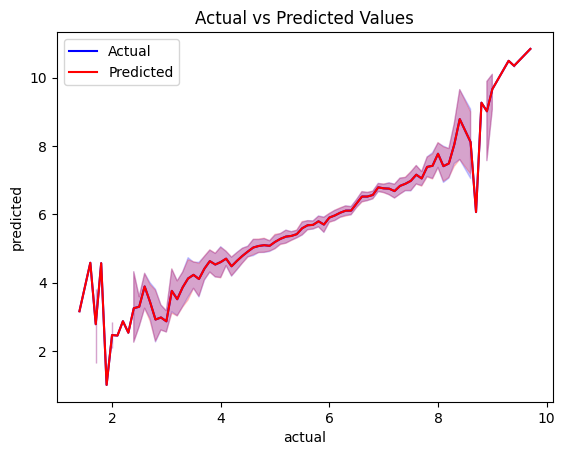

In [37]:
plt.title("Actual vs Predicted Values")
sns.lineplot(x=results['actual'], y=results['predicted'], data=results, color='blue',alpha=1, label='Actual')
sns.lineplot(x=results['actual'], y=results['predicted'], data=results, color='red', label='Predicted')
plt.show()

In [39]:
# Remove any 'index' column from df_update after resetting the index
if 'index' in df_update.columns:
    df_update.drop(columns=['index'], inplace=True)

# Now redefine X and Y without the index column
X = df_update.drop('Rating', axis=1)
Y = df_update['Rating']

# Train-test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Building the linear regression model
LR = LinearRegression()
LR.fit(X_train, Y_train)

# Prepare movie_data for prediction with correct columns
movie_data = pd.DataFrame(
    {
        'Duration': [171],             # Duration in minutes
        'Votes': [115000],             # Votes as integer
        'Year': [2017],                # Release year
        'actor1_encoded': [7.8],       # Encoded rating for Prabhas
        'actor2_encoded': [7.6],       # Encoded rating for Rana Daggubati
        'actor3_encoded': [7.9],       # Encoded rating for Anushka Shetty
        'director_encoded': [8.3],     # Encoded rating for S.S. Rajamouli
        'genre_encoded': [7.2]         # Encoded rating for Action, Fantasy
    }
)

# Match columns of 'movie_data' with those in 'X' for prediction
movie_data = movie_data[X.columns]

# Predict the rating for 'Bahubali The Conclusion'
predicted_rating = LR.predict(movie_data)[0]

# Known IMDb rating for comparison
actual_rating = 8.2  # Actual rating for 'Bahubali The Conclusion'

# Display the result
print(f"Predicted rating: {predicted_rating}")
print(f"Actual rating: {actual_rating}")


Predicted rating: 9.398506397396046
Actual rating: 8.2


In [40]:
# Movie Rating Prediction for 'Bahubali The Conclusion' movie
movie_data = pd.DataFrame(
    {
        'Duration': [171],            # Duration in minutes
        'Votes': [115],               # votes IMDB (114,090)
        'Year': [2017],               # Release year
        'actor1_encoded': [7.8],      # Encoded rating for Prabhas
        'actor2_encoded': [7.6],      # Encoded rating for Rana Daggubati
        'actor3_encoded': [7.9],      # Encoded rating for Anushka Shetty
        'director_encoded': [8.3],    # Encoded rating for S.S. Rajamouli
        'genre_encoded': [7.2]        # Encoded rating for Action, Fantasy
    }
)

# Reorder columns to match the original model's feature input order
movie_data = movie_data[X.columns]

# Predict the rating for '3 Idiots'
predicted_rating = LR.predict(movie_data)[0]

# Known IMDb rating for comparison
actual_rating = 8.2  # Actual rating for 'Bahubali The Conclusion'

# Display the result
print(f"Predicted rating: {predicted_rating}")
print(f"Actual rating: {actual_rating}")

# predicted_rating = LR.predict(movie_data)[0]
# print(f"Predicted rating: {predicted_rating}")
# print(f"Actual rating: {actual_rating}")


Predicted rating: 8.854911532051313
Actual rating: 8.2


In [41]:
# Movie Rating Prediction for '3 idiots' movie
movie_data = pd.DataFrame(
    {
        'Duration': [170],            # Duration in minutes
        'Votes': [367],               # votes IMDB (3,67,000)
        'Year': [2009],               # Release year
        'actor1_encoded': [8.1],      # Encoded rating for Aamir Khan
        'actor2_encoded': [7.6],      # Encoded rating for R. Madhavan
        'actor3_encoded': [7.3],      # Encoded rating for Sharman Joshi
        'director_encoded': [8.2],    # Encoded rating for Rajkumar Hirani
        'genre_encoded': [7.8]        # Encoded rating for Comedy, Drama
    }
)

# Reorder columns to match the original model's feature input order
movie_data = movie_data[X.columns]

# Predict the rating for '3 Idiots'
predicted_rating = LR.predict(movie_data)[0]

# Known IMDb rating for comparison
actual_rating = 8.4  # Actual rating for '3 Idiots'

print(f"Predicted rating: {predicted_rating}")
print(f"Actual rating: {actual_rating}")


Predicted rating: 8.756340517154083
Actual rating: 8.4


In [4]:
# Movie Rating Prediction for 'Bhool Bhulaiyaa 3' movie
movie_data_bhool_bhulaiyaa_3 = pd.DataFrame(
    {
        'Duration': [145],            # Example duration in minutes
        'Votes': [250],               # Example votes on IMDb in thousands (250,000)
        'Year': [2024],               # Example release year
        'actor1_encoded': [7.4],      # Encoded rating for Kartik Aaryan
        'actor2_encoded': [6.8],      # Encoded rating for Kiara Advani
        'actor3_encoded': [7.2],      # Encoded rating for Tabu
        'director_encoded': [7.5],    # Encoded rating for Anees Bazmee (example director)
        'genre_encoded': [7.0]        # Encoded rating for Comedy, Horror genre
    }
)

# Reorder columns to match the original model's feature input order
movie_data_bhool_bhulaiyaa_3 = movie_data_bhool_bhulaiyaa_3[X.columns]

# Predict the rating for 'Bhool Bhulaiyaa 3'
predicted_rating_bhool_bhulaiyaa_3 = LR.predict(movie_data_bhool_bhulaiyaa_3)[0]

print(f"Predicted rating for 'Bhool Bhulaiyaa 3': {predicted_rating_bhool_bhulaiyaa_3}")


NameError: name 'X' is not defined

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Load dataset
# Encoding categorical data (director and actors)
label_encoder = LabelEncoder()
df_update['director_encoded'] = label_encoder.fit_transform(df_update['Director'])
df_update['actor1_encoded'] = label_encoder.fit_transform(df_update['Actor1'])
df_update['actor2_encoded'] = label_encoder.fit_transform(df_update['Actor2'])
df_update['actor3_encoded'] = label_encoder.fit_transform(df_update['Actor3'])

# Encoding genre (assuming genres are separated by commas)
df['genre_encoded'] = df['Genre'].apply(lambda x: sum([hash(genre) for genre in x.split(', ')]))

# Select features and target variable
X = df_update[['Duration', 'Votes', 'Year', 'director_encoded', 'actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'genre_encoded']]
y = df_update['IMDb Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
LR = LinearRegression()
LR.fit(X_train, y_train)

# Make a prediction for "Bhool Bhulaiyaa 3"
movie_data_bhool_bhulaiyaa_3 = pd.DataFrame(
    {
        'Duration': [145],
        'Votes': [250],
        'Year': [2024],
        'director_encoded': [label_encoder.transform(['Priyadarshan'])[0]],
        'actor1_encoded': [label_encoder.transform(['Akshay Kumar'])[0]],
        'actor2_encoded': [label_encoder.transform(['Govinda'])[0]],
        'actor3_encoded': [label_encoder.transform(['Paresh Rawal'])[0]],
        'genre_encoded': [hash('Comedy') + hash('Horror')]
    }
)

predicted_rating_bhool_bhulaiyaa_3 = LR.predict(movie_data_bhool_bhulaiyaa_3)[0]
print(f"Predicted rating for 'Bhool Bhulaiyaa 3': {predicted_rating_bhool_bhulaiyaa_3}")


NameError: name 'df_update' is not defined